In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from __future__ import print_function
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.ipython_useSVG = True
IPythonConsole.molSize=(600,400)
 
def mol_with_atom_index( mol ):
    atoms = mol.GetNumAtoms()
    for idx in range( atoms ):
        mol.GetAtomWithIdx( idx ).SetProp( 'molAtomMapNumber', str( mol.GetAtomWithIdx( idx ).GetIdx() ) )
    return mol

In [3]:
import sys,os
import rdkit
import networkx as nx
import pandas as pd
import fastparquet

In [4]:
sys.path.insert(0,"../../src/main/")

In [5]:
from importlib import reload
import molutils

In [7]:
df=fastparquet.ParquetFile("../input/traintest_submols.parq").to_pandas()


     RDKit          2D

  4  3  0  0  0  0  0  0  0  0999 V2000
   -0.0187    1.5256    0.0104 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.0021   -0.0039    0.0020 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.9949    1.9397    0.0029 H   0  0  0  0  0  0  0  0  0  0  0  0
    0.5255   -0.4019    0.8775 H   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  1  0
  1  3  1  0
  2  4  1  0
M  END



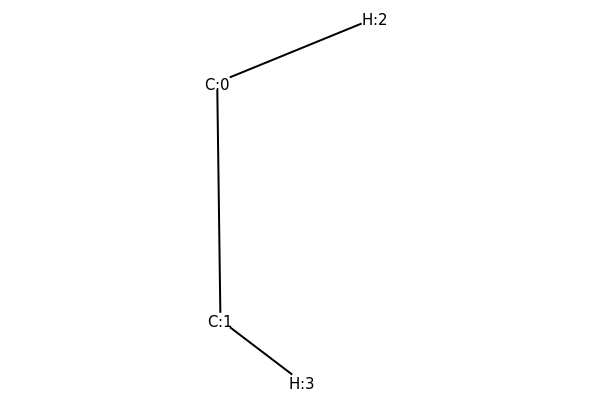


     RDKit          2D

  8  7  0  0  0  0  0  0  0  0999 V2000
   -0.0187    1.5256    0.0104 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.0021   -0.0039    0.0020 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.9949    1.9397    0.0029 H   0  0  0  0  0  0  0  0  0  0  0  0
   -0.5421    1.9236   -0.8651 H   0  0  0  0  0  0  0  0  0  0  0  0
   -0.5252    1.9142    0.9000 H   0  0  0  0  0  0  0  0  0  0  0  0
    0.5255   -0.4019    0.8775 H   0  0  0  0  0  0  0  0  0  0  0  0
   -1.0115   -0.4180    0.0095 H   0  0  0  0  0  0  0  0  0  0  0  0
    0.5086   -0.3925   -0.8876 H   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  1  0
  1  3  1  0
  1  4  1  0
  1  5  1  0
  2  6  1  0
  2  7  1  0
  2  8  1  0
M  END



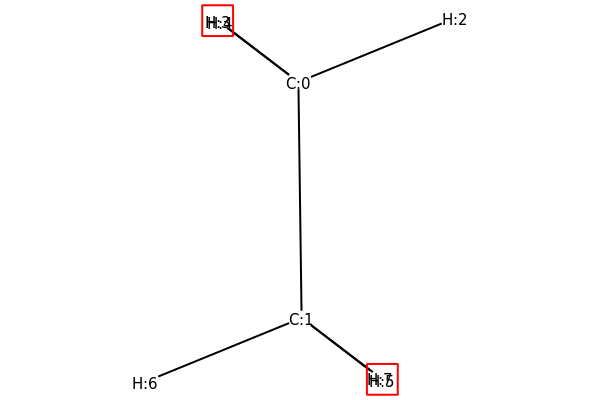

In [50]:
for i in range(df.shape[1]):
    s=df.iloc[23,i]
    if s:
        mol=Chem.Mol(s)
        print(Chem.MolToMolBlock(mol))
        display(mol_with_atom_index(mol))

In [51]:
a=mol.GetAtomWithIdx(0)


In [26]:
c=mol.GetConformer()

In [41]:
b=mol.GetBondBetweenAtoms(0,1)
b.GetBeginAtomIdx(),b.GetEndAtomIdx()

(0, 1)

In [42]:
b=mol.GetBondWithIdx(0)
b.GetBeginAtomIdx(),b.GetEndAtomIdx()

(0, 1)

In [38]:
[ u for u in dir(b) if   u[0] !='_' and u[:2] in ['Ge','Is']]

['GetBeginAtom',
 'GetBeginAtomIdx',
 'GetBondDir',
 'GetBondType',
 'GetBondTypeAsDouble',
 'GetBoolProp',
 'GetDoubleProp',
 'GetEndAtom',
 'GetEndAtomIdx',
 'GetIdx',
 'GetIntProp',
 'GetIsAromatic',
 'GetIsConjugated',
 'GetOtherAtom',
 'GetOtherAtomIdx',
 'GetOwningMol',
 'GetProp',
 'GetPropNames',
 'GetPropsAsDict',
 'GetSmarts',
 'GetStereo',
 'GetStereoAtoms',
 'GetUnsignedProp',
 'GetValenceContrib',
 'IsInRing',
 'IsInRingSize']

In [43]:
a=[1,2,3]

In [45]:
list(zip(a[:-1],a[1:]))

[(1, 2), (2, 3)]

In [53]:
mol.GetBondBetweenAtoms(1,3)

In [54]:
Chem.MolToSmiles(mol)

'[C:0]([C:1]([H:5])([H:6])[H:7])([H:2])([H:3])[H:4]'

In [62]:
Chem.MolToSmiles(mol,isomericSmiles=False)

'[C:0]([C:1]([H:5])([H:6])[H:7])([H:2])([H:3])[H:4]'

In [59]:
a=Chem.MolToSmiles(mol, canonical=True)
a

'[C:0]([C:1]([H:5])([H:6])[H:7])([H:2])([H:3])[H:4]'

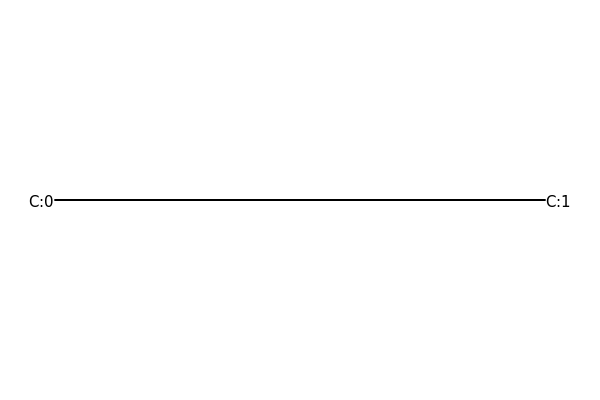

In [60]:
Chem.MolFromSmiles(a)

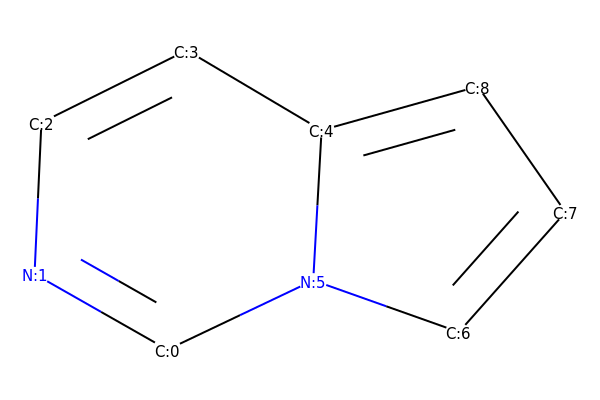

In [65]:
    mol = Chem.MolFromSmiles('c1nccc2n1ccc2')
    AllChem.Compute2DCoords(mol)
    AllChem.EmbedMolecule(mol)
    mol_with_atom_index(mol)

In [72]:
for a in mol.GetAtoms():
    print ( str(a.GetHybridization()).lower() )

sp2
sp2
sp2
sp2
sp2
sp2
sp2
sp2
sp2


In [73]:
from deepchem import feat 


/home/bo/miniconda2/envs/deepchem/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [85]:
obj= feat.AdjacencyFingerprint(max_n_atoms=30)

In [86]:
a=obj.featurize([mol])[0]

In [87]:
a[0].shape

(30, 30)

In [88]:
a[1].shape

(30, 75)

In [89]:
obj=feat.AtomicCoordinates()

In [90]:
a=obj.featurize([mol])[0]

In [93]:
a.shape, mol.GetNumAtoms()

((1, 9, 3), 9)

In [95]:
obj=feat.atomic_coordinates.NeighborListAtomicCoordinates()
a=obj.featurize([mol])[0]

In [97]:
len(a)

2

In [99]:
a[0].shape

(9, 3)

In [100]:
a[1]

{0: [1, 2, 3, 4, 5, 6, 7, 8],
 1: [0, 2, 3, 4, 5, 6],
 2: [1, 0, 3, 4, 5, 8],
 3: [1, 2, 0, 4, 5, 6, 7, 8],
 4: [1, 2, 0, 3, 5, 6, 7, 8],
 5: [1, 2, 0, 3, 4, 6, 7, 8],
 6: [1, 0, 3, 5, 4, 7, 8],
 7: [0, 3, 5, 4, 6, 8],
 8: [2, 0, 3, 5, 4, 6, 7]}

In [101]:
obj=feat.RDKitDescriptors()
a=obj.featurize([mol])[0]

In [103]:
a.shape

(111,)

In [104]:
obj=feat.BPSymmetryFunctionInput(max_atoms=30)
a=obj.featurize([mol])[0]

In [106]:
a.shape

(30, 4)

In [107]:
obj=feat.CoulombMatrix(max_atoms=30)
a=obj.featurize([mol])[0]

(1, 30, 30)

In [110]:
obj=feat.CoulombMatrixEig(max_atoms=30)
a=obj.featurize([mol])[0]
a.shape

(1, 30)

In [114]:
obj=feat.CircularFingerprint(size=1024, )
a=obj.featurize([mol])[0]
a.shape

(1024,)

In [119]:
obj=feat.ConvMolFeaturizer()
a=obj.featurize([mol])[0]


In [125]:
a.n_feat

75

In [129]:
a.atom_features.shape

(9, 75)

In [127]:
a.canon_adj_list

[[1, 8], [0, 2], [1, 3], [2, 7], [8, 5], [4, 6], [5, 7], [3, 8, 6], [7, 4, 0]]

In [130]:
obj=feat.WeaveFeaturizer()
a=obj.featurize([mol])[0]


In [134]:
a.num_atoms,a.nodes, a.pairs

(9, array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
         0, 0, 0, 1, 0, 1, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
         0, 0, 0, 1, 1, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
         0, 0, 0, 1, 0, 1, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0

In [179]:
obj=feat.RDKitDescriptors()
a=obj.featurize([mol])[0]
a.shape

(111,)

In [181]:
obj.descriptors

['MaxEStateIndex',
 'MinEStateIndex',
 'MaxAbsEStateIndex',
 'MinAbsEStateIndex',
 'MolWt',
 'HeavyAtomMolWt',
 'ExactMolWt',
 'NumValenceElectrons',
 'NumRadicalElectrons',
 'MaxPartialCharge',
 'MinPartialCharge',
 'MaxAbsPartialCharge',
 'MinAbsPartialCharge',
 'BalabanJ',
 'BertzCT',
 'Chi0',
 'Chi0n',
 'Chi0v',
 'Chi1',
 'Chi1n',
 'Chi1v',
 'Chi2n',
 'Chi2v',
 'Chi3n',
 'Chi3v',
 'Chi4n',
 'Chi4v',
 'HallKierAlpha',
 'Ipc',
 'Kappa1',
 'Kappa2',
 'Kappa3',
 'LabuteASA',
 'PEOE_VSA1',
 'PEOE_VSA10',
 'PEOE_VSA11',
 'PEOE_VSA12',
 'PEOE_VSA13',
 'PEOE_VSA14',
 'PEOE_VSA2',
 'PEOE_VSA3',
 'PEOE_VSA4',
 'PEOE_VSA5',
 'PEOE_VSA6',
 'PEOE_VSA7',
 'PEOE_VSA8',
 'PEOE_VSA9',
 'SMR_VSA1',
 'SMR_VSA10',
 'SMR_VSA2',
 'SMR_VSA3',
 'SMR_VSA4',
 'SMR_VSA5',
 'SMR_VSA6',
 'SMR_VSA7',
 'SMR_VSA8',
 'SMR_VSA9',
 'SlogP_VSA1',
 'SlogP_VSA10',
 'SlogP_VSA11',
 'SlogP_VSA12',
 'SlogP_VSA2',
 'SlogP_VSA3',
 'SlogP_VSA4',
 'SlogP_VSA5',
 'SlogP_VSA6',
 'SlogP_VSA7',
 'SlogP_VSA8',
 'SlogP_VSA9',
 'TPS

In [144]:
obj=feat.CoulombMatrixEig(max_atoms=30)
a=obj.featurize([mol])[0]
a.shape

(1, 30)

In [162]:
obj=feat.CircularFingerprint(size=1024)
a=obj.featurize([mol])[0]
np.where(a>0)

(array([  64,   77,   95,  184,  356,  378,  395,  470,  571,  579,  585,
         620,  726,  756,  842,  843,  849,  874,  932,  935, 1019]),)

In [164]:
a=Chem.rdMolDescriptors.GetMorganFingerprintAsBitVect(mol,2,nBits=1024)
a=np.asarray(a)
np.where(a>0)

(array([  64,   77,   95,  184,  356,  378,  395,  470,  571,  579,  585,
         620,  726,  756,  842,  843,  849,  874,  932,  935, 1019]),)

In [161]:
a=Chem.rdMolDescriptors.GetHashedAtomPairFingerprintAsBitVect(mol, nBits=1024)
a=np.asarray(a)
np.where(a>0)

(array([ 120,  124,  184,  220,  221,  222,  224,  225,  226,  232,  348,
         352,  353,  472,  473,  484,  485,  600,  601,  612,  613,  664,
         760,  761,  888,  889, 1020, 1021, 1022]),)

In [165]:
a=Chem.rdMolDescriptors.GetHashedTopologicalTorsionFingerprintAsBitVect(mol, nBits=1024)
a=np.asarray(a)
np.where(a>0)

(array([  24,   28,   48,  176,  364,  380,  381,  504,  505,  684,  696,
         760,  848,  849,  850, 1016]),)

In [168]:
df=pd.read_csv("../../input/qm9/qm9.csv").drop('smiles',axis=1)

In [173]:
def f(name):
    name=int(name.split("_")[-1])
    name="dsgdb9nsd_{:06}".format(name)
    return name

In [174]:
df['molecule_name']=df['mol_id'].map(f)

In [176]:
df=df.drop('mol_id',axis=1)

In [177]:
df.head()

A           B           C      mu  alpha    homo    lumo     gap  \
0  157.71180  157.709970  157.706990  0.0000  13.21 -0.3877  0.1171  0.5048   
1  293.60975  293.541110  191.393970  1.6256   9.46 -0.2570  0.0829  0.3399   
2  799.58812  437.903860  282.945450  1.8511   6.31 -0.2928  0.0687  0.3615   
3    0.00000   35.610036   35.610036  0.0000  16.28 -0.2845  0.0506  0.3351   
4    0.00000   44.593883   44.593883  2.8937  12.99 -0.3604  0.0191  0.3796   

        r2      zpve         u0       u298       h298       g298     cv  \
0  35.3641  0.044749 -40.478930 -40.476062 -40.475117 -40.498597  6.469   
1  26.1563  0.034358 -56.525887 -56.523026 -56.522082 -56.544961  6.316   
2  19.0002  0.021375 -76.404702 -76.401867 -76.400922 -76.422349  6.002   
3  59.5248  0.026841 -77.308427 -77.305527 -77.304583 -77.327429  8.574   
4  48.7476  0.016601 -93.411888 -93.409370 -93.408425 -93.431246  6.278   

      u0_atom   u298_atom   h298_atom   g298_atom     molecule_name  
0 -395.999595 -398.643290 -401.014647 -372.471772  dsgdb9nsd_000001  
1 -276.861363 -278.620271 -280.399259 -259.338802  dsgdb9nsd_000002  
2 -213.087624 -213.974294 -215.159658 -201.407171  dsgdb9nsd_000003  
3 -385.501997 -387.237686 -389.016047 -365.800724  dsgdb9nsd_000004  
4 -301.820534 -302.906752 -304.091489 -288.720028  dsgdb9nsd_000005

In [178]:
df.shape

(133885, 20)